In [14]:
import os
import json
import matplotlib.pyplot as plt

In [9]:
experiment_folders = ['enterprise_baseline', 'enterprise_decoy', 'enterprise_honeyservice']

# Open all json files and store them in a list
data = {}
for folder in experiment_folders:
    data[folder] = []
    for file in os.listdir('data/' + folder):
        if file.endswith(".json"):
            # Get json file contents
            with open('data/' + folder + '/' + file) as f:
                data[folder].append(json.load(f))

In [16]:
# For each experiment get runtime data
runtime_data = {}
for folder in experiment_folders:
    runtime_data[folder] = []
    for experiment in data[folder]:
        # Convert data to minutes
        experiment['execution_time'] = (experiment['execution_time']) / 60
        runtime_data[folder].append(experiment['execution_time'])


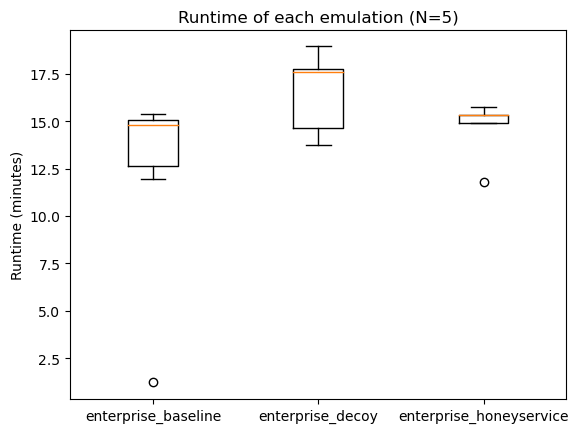

In [18]:
# Plot runtime data in box and whisker plot
fig, ax = plt.subplots()
ax.boxplot(runtime_data.values())
ax.set_xticklabels(runtime_data.keys())
ax.set_ylabel('Runtime (minutes)')
ax.set_title('Runtime of each emulation (N=5)')
plt.show()